In [1]:
import os
sep_local = os.path.sep
sep_local

In [2]:
import sys
sys.path.append('..'+sep_local+'..')

Compute dtype: float16
Variable dtype: float32


In [3]:
#done in case of linux
#os.chdir("/home/azeghost/git/Generative_Models")
#os.chdir('..'+sep_local+'..')

In [4]:
import tensorflow as tf
tf.__version__

'2.0.0-rc1'

In [5]:
dataset_name = 'mnist'
import tensorflow_datasets as tfds

info = tfds.builder(dataset_name).info

print(info)

In [7]:
intermediate_dim = 20
inputs_shape=(28, 28, 1) # image shape
batch_size = 100
latent_dim = 50

In [8]:
TRAIN_BUF = 600
TEST_BUF = 100


In [9]:
import tensorflow_datasets as tfds
# Construct a tf.data.Dataset
train_ds = tfds.load(name=dataset_name, split=tfds.Split.TRAIN).shuffle(TRAIN_BUF).batch(batch_size)
try:
    test_ds = tfds.load(name=dataset_name, split=tfds.Split.TEST).shuffle(TEST_BUF).batch(batch_size)
except:
    test_ds = tfds.load(name=dataset_name, split=tfds.Split.TRAIN).shuffle(TEST_BUF).batch(batch_size)


In [10]:
_instance_scale=1.0
for data in train_ds:
    _instance_scale = float(data['image'][0].numpy().max())
    break

In [11]:
_instance_scale

255.0

In [12]:
enc_lays2 = [
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    # No activation
    tf.keras.layers.Dense(latent_dim)
]

dec_lays2 = [
    tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
    tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
    tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation='relu'),
    
    # No activation
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(1, 1), padding="SAME")
]

In [13]:
enc_mean_lays = [tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu')]

enc_var_lays = [tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu')]

dec_lays = [tf.keras.layers.Dense(units=2*intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=2*intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=2*intermediate_dim, activation='relu')]

In [14]:
#from utils.data_and_files.file_utils import make_random_string
#from time import gmtime, strftime

#model_name = 'AE_' + make_random_string(5) + strftime("%a_%d_%b_%Y_%H_%M", gmtime())
#print(model_name)

In [15]:
model_name = dataset_name+'Dense_VAE'

In [16]:
import os
#recording_dir='..'+sep_local+'..'+sep_local+'..'+sep_local+'recording'+sep_local + model_name
os.getcwd()
recording_dir=os.getcwd()+ sep_local  +'recording'+sep_local + model_name

In [17]:
from os.path import abspath
absolute = abspath(recording_dir)
print("Recording_dir",absolute)
print("Current working dir",os.getcwd())

In [19]:
from training.autoencoding_basic.autoencoders.VAE import VAE

Using TensorFlow backend.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [20]:
variables_params = \
[
    {
        'name': 'inference_mean', 
        'inputs_shape':inputs_shape,
        'outputs_shape':latent_dim,
        'layers': enc_mean_lays
    },

    {
    'name': 'inference_logvariance', 
    'inputs_shape':inputs_shape,
    'outputs_shape':latent_dim,
    'layers': enc_var_lays
    }
    ,
    
        {
        'name': 'generative', 
        'inputs_shape':latent_dim,
        'outputs_shape':inputs_shape,
        'layers':dec_lays
    }
]

In [21]:
from utils.data_and_files.file_utils import create_if_not_exist
_restore = os.path.join(recording_dir, 'var_save_dir')
create_if_not_exist(_restore)
absolute = abspath(_restore)
print("Restore_dir",absolute)

In [22]:
ae = VAE( 
    name=model_name,
    inputs_shape=inputs_shape,
    outputs_shape=inputs_shape,
    latent_dim=latent_dim,
    batch_size=batch_size,
    variables_params=variables_params, 
    filepath=None #to restore trained model, set filepath=_restore
    )

'..\\recording\\mnistVAE\\var_save_dir'

In [23]:
ae.compile(metrics=None)

Model: "inference_mean"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 28, 28, 20)        40        
_________________________________________________________________
dense_3 (Dense)              (None, 28, 28, 20)        420       
_________________________________________________________________
dense_4 (Dense)              (None, 28, 28, 20)        420       
_________________________________________________________________
flatten_1 (Flatten)          (None, 15680)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                784050    
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)             

  WARNING  | None


Model: "inference_logvariance"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28, 28, 20)        40        
_________________________________________________________________
dense_6 (Dense)              (None, 28, 28, 20)        420       
_________________________________________________________________
dense_7 (Dense)              (None, 28, 28, 20)        420       
_________________________________________________________________
flatten_2 (Flatten)          (None, 15680)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                784050    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)      

  WARNING  | None


Model: "generative"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1640      
_________________________________________________________________
flatten_3 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 784)               32144     
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0

  WARNING  | None


In [24]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)
from training.callbacks.progress_bar import NotebookPrograssBar
from training.callbacks.sample_generation import SampleGeneration
from training.callbacks.save_model import ModelSaver

  INFO     | ==================================================================


  DEBUG    | TRAIN
    Epoch: 9
    logpx_z: -37199.765625
    logpz: -42659.98828125
    logqz_x: 31976.16015625
    Total: -77.91220092773438
    Elapsed: 96.894461


  INFO     | ==================================================================


  INFO     | ==================================================================


  DEBUG    | TEST
    Epoch: 9
    logpx_z: -6036.9521484375
    logpz: -7110.97705078125
    logqz_x: 5306.30029296875
    Total: -79.81681823730469
    Elapsed: 2.264743


  INFO     | ==================================================================


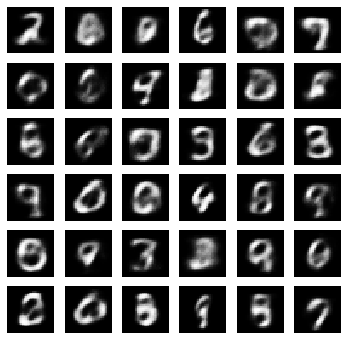

Epochs Progress, Training Iterations 599: 100%|███████████████████████████████████████| 10/10 [16:43<00:00, 100.32s/it]
Testing ...: 4950it [00:02, 1747.03it/s]


In [25]:
progbar = NotebookPrograssBar(leave_outer=False)

In [26]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    min_delta=1e-12, 
    patience=5, 
    verbose=1, 
    restore_best_weights=True
)

In [ ]:
ms = ModelSaver(filepath=_restore,save_freq=5)

In [ ]:
csv_dir = os.path.join(recording_dir, 'csv_dir')
create_if_not_exist(csv_dir)
csv_dir = os.path.join(csv_dir, model_name+'.csv')
csv_log = tf.keras.callbacks.CSVLogger(csv_dir, append=True)
absolute = abspath(csv_dir)
print("Csv_dir",absolute)

In [ ]:
image_gen_dir = os.path.join(recording_dir, 'image_gen_dir')
create_if_not_exist(image_gen_dir)
absolute = abspath(image_gen_dir)
print("Image_gen_dir",absolute)

In [ ]:
sg = SampleGeneration(latent_shape=6, filepath=image_gen_dir, gen_freq=5, save_img=True, gray_plot=True)

In [ ]:
ae.fit(
    x=train_ds,
    steps_per_epoch=2500,
    epochs=100, 
    verbose=0,
    callbacks=[progbar, es, ms, csv_log, sg],
    workers=-1,
    use_multiprocessing=True
)

In [ ]:
# probably won't work since the structure of model changed thus no exposed encode decode func available
for batch in train_ds:
    image = batch['image'].numpy()[0]
    break

In [ ]:
import matplotlib.pyplot as plt

In [34]:
# probably won't work since the structure of model changed thus no exposed encode decode func available
for batch in train_ds:
    image = batch['image'].numpy()[0]
    break

In [35]:
import matplotlib.pyplot as plt

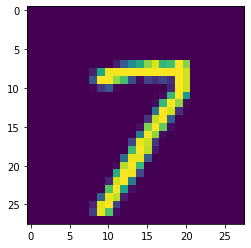

In [36]:
plt.imshow(image.reshape(28,28))

In [37]:
reconst = ae.decode(ae.encode(image))

In [38]:
type(reconst)

tensorflow.python.framework.ops.EagerTensor

In [39]:
isinstance(reconst, tf.Tensor)

True

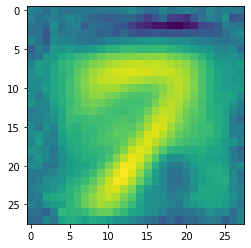

In [40]:
plt.imshow(reconst.numpy().reshape(28,28))